# Projet réduction de dimensionnalité et techniques de clustering - Projet 2
## Chargement des données

In [1]:
import pandas as pd
import numpy as np
df_decathlon= pd.read_csv('src/decathlon.csv', sep=';')
df_decathlon.head()

,Unnamed: 0,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO


In [2]:
df_decathlon.rename(columns={'Unnamed: 0':'Nom'}, inplace=True)
df_decathlon.head()

,Nom,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO


In [3]:
df_decathlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nom          41 non-null     object 
 1   100m         41 non-null     float64
 2   Longueur     41 non-null     float64
 3   Poids        41 non-null     float64
 4   Hauteur      41 non-null     float64
 5   400m         41 non-null     float64
 6   110m H       41 non-null     float64
 7   Disque       41 non-null     float64
 8   Perche       41 non-null     float64
 9   Javelot      41 non-null     float64
 10  1500m        41 non-null     float64
 11  Classement   41 non-null     int64  
 12  Points       41 non-null     int64  
 13  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ KB


Pas de données manquantes

In [4]:
df_decathlon.describe()

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


Pas de données aberrantes à première vue.

***
## 1. ACP

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipe = make_pipeline(scaler, pca)

In [109]:
features = df_decathlon.iloc[:,1:11]
features_trans = pipe.fit_transform(features)
features_trans = pd.DataFrame(features_trans, columns=['PC'+str(i) for i in range(1,11)])
features_trans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,4.038449,1.365826,-0.289957,1.941134,-0.376955,0.067786,-0.554977,-0.752596,0.062225,0.633131
1,3.919365,0.836961,0.231175,1.493972,1.037609,-0.812650,-0.867515,-0.302845,-0.013215,-0.818729
2,4.619987,0.039995,-0.041586,-1.313526,-0.187730,0.741611,-0.454143,1.070842,-0.180315,0.124575
3,2.233461,1.041766,-1.864362,-0.743214,-0.977270,-0.040017,-0.192708,0.689743,0.438425,-0.166834
4,2.168396,-1.803200,0.851017,-0.284600,0.151395,-0.079388,0.061003,0.214545,0.167392,0.082692


### Variance expliquée par chaque PC

In [13]:
caract_pc = pd.DataFrame({'Composante':['PC'+str(i) for i in range(1,11)], 'Valeur propre' : np.round(pca.explained_variance_,2),
                         '% Variance' : np.round(pca.explained_variance_ratio_,2), '% Variance cumulée' : np.round(np.cumsum(pca.explained_variance_ratio_),2)})

caract_pc.set_index('Composante')

,Valeur propre,% Variance,% Variance cumulée
Composante,,,
PC1,3.35,0.33,0.33
PC2,1.78,0.17,0.50
PC3,1.44,0.14,0.64
PC4,1.08,0.11,0.75
PC5,0.70,0.07,0.82
PC6,0.61,0.06,0.88
PC7,0.46,0.05,0.92
PC8,0.41,0.04,0.96
PC9,0.22,0.02,0.98


### Scree plot

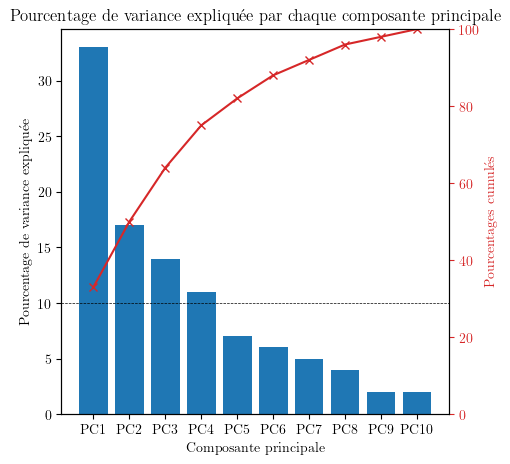

In [39]:
import matplotlib.pyplot as plt
# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

fig, ax = plt.subplots(figsize=(5,5))

ax.axhline(10, linestyle="--", color='black', linewidth=0.5)
ax.bar(np.arange(1,11,1), caract_pc['% Variance']*100, color='tab:blue')
ax.set_xticks(np.arange(1,11,1), caract_pc['Composante'])
plt.title("Pourcentage de variance expliquée par chaque composante principale")
ax.set_xlabel("Composante principale")
ax.set_ylabel("Pourcentage de variance expliquée")
#Deuxième axe pour les pourcentages cumulés
ax2 = ax.twinx()
ax2.set_ylabel('Pourcentages cumulés', color='tab:red')
ax2.tick_params(axis='y', color='tab:red', labelcolor='tab:red')
ax2.set_ylim(0,100)
ax2.plot(np.arange(1,11,1), caract_pc['% Variance cumulée']*100, color='tab:red', marker='x')

plt.show()

Il n'y a pas de coude "franc" visuellement parlant. Pour une utilisation ultérieure, il semble que 5 composantes principales soit un bon choix.

Si on ne garde que les composantes dont la part de variance expliquée est supérieure à 10 % (100/10 = 10 %), on ne garde que 4 composantes.

### Cercle de corrélations selon PC1 et PC2

In [12]:
# Calcul des saturations des variables sur les PC
saturations = pd.DataFrame(pca.components_.T*np.sqrt(pca.explained_variance_),
                           columns=['PC'+str(i) for i in range(1,11)],
                           index=df_decathlon.columns[1:11])
saturations

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
100m,-0.784344,0.189467,-0.186698,-0.038288,-0.305951,0.232048,-0.259640,-0.294413,0.049156,0.183368
Longueur,0.751116,-0.349712,0.184475,0.103050,-0.037134,-0.239923,-0.426885,0.013401,0.226487,0.035026
Poids,0.630236,0.605736,-0.023669,0.192959,-0.112532,0.239412,0.210640,0.200227,0.200501,0.168675
Hauteur,0.579050,0.354645,-0.262736,-0.137279,-0.562340,-0.366612,0.062194,-0.079784,-0.114335,-0.045996
400m,-0.688053,0.576512,0.133103,0.029666,0.088781,-0.260611,0.084617,-0.136107,0.259081,-0.178922
110m H,-0.755516,0.231636,-0.093788,0.294444,-0.166362,-0.078090,-0.243015,0.453554,-0.070449,-0.039270
Disque,0.559330,0.613846,0.043486,-0.262897,0.106129,0.352192,-0.292362,-0.024485,-0.072642,-0.194122
Perche,0.050967,-0.182597,0.700350,0.558386,-0.334058,0.205077,0.066621,-0.113554,-0.038936,-0.119478
Javelot,0.280553,0.320927,-0.394496,0.721126,0.308919,-0.127909,-0.072596,-0.188882,-0.116055,0.037934
1500m,-0.058799,0.480115,0.791859,-0.163090,0.155470,-0.233766,-0.056875,-0.008749,-0.144401,0.185507


In [130]:
# saturations de classement et points sur les composantes PC1 et PC2
scaler = StandardScaler()
resultats_stand = pd.DataFrame(scaler.fit_transform(df_decathlon[['Classement','Points']]), columns=['Classement','Points'])
sat_class_pc1 = np.corrcoef(features_trans.iloc[:,0], df_decathlon['Classement'])[0,1]
sat_class_pc2 = np.corrcoef(features_trans.iloc[:,1], df_decathlon['Classement'])[0,1]
sat_class_pc3 = np.corrcoef(features_trans.iloc[:,2], df_decathlon['Classement'])[0,1]
sat_pts_pc1 = np.corrcoef(features_trans.iloc[:,0], df_decathlon['Points'])[0,1]
sat_pts_pc2 = np.corrcoef(features_trans.iloc[:,1], df_decathlon['Points'])[0,1]
sat_pts_pc3 = np.corrcoef(features_trans.iloc[:,2], df_decathlon['Points'])[0,1]

In [43]:
# Calcul des cos2
cos2 = saturations**2
cos2_pc12 = cos2['PC1']+cos2['PC2']
cos2_pc12

100m        0.651093
Longueur    0.686474
Poids       0.764113
Hauteur     0.461073
400m        0.805782
110m H      0.624459
Disque      0.689656
Perche      0.035939
Javelot     0.181704
1500m       0.233968
dtype: float64

In [44]:
#Echelle de couleurs pour représenter les cos2
import cmasher as cmr
import matplotlib.colors as mcolors

cmap = cmr.get_sub_cmap('cmr.ember', 0.1, 0.9)
norm = mcolors.Normalize(vmin=np.min(cos2_pc12), vmax=np.max(cos2_pc12))
color=[]
for i in range(len(cos2_pc12)):
    color.append(cmap(norm(cos2_pc12[i])))
df_cos2=pd.DataFrame({'cos2':cos2_pc12, 'couleur':color})
df_cos2

,cos2,couleur
100m,0.651093,"(0.92256581, 0.44989274, 0.00709035, 1.0)"
Longueur,0.686474,"(0.93644377, 0.51408422, 0.00577811, 1.0)"
Poids,0.764113,"(0.9532101, 0.64271996, 0.06919261, 1.0)"
Hauteur,0.461073,"(0.78144269, 0.10756477, 0.167764, 1.0)"
400m,0.805782,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
110m H,0.624459,"(0.91066237, 0.40470882, 0.01887928, 1.0)"
Disque,0.689656,"(0.93644377, 0.51408422, 0.00577811, 1.0)"
Perche,0.035939,"(0.07642223, 0.04959208, 0.10530298, 1.0)"
Javelot,0.181704,"(0.31214195, 0.10225778, 0.24249139, 1.0)"
1500m,0.233968,"(0.39720948, 0.10190626, 0.26456809, 1.0)"


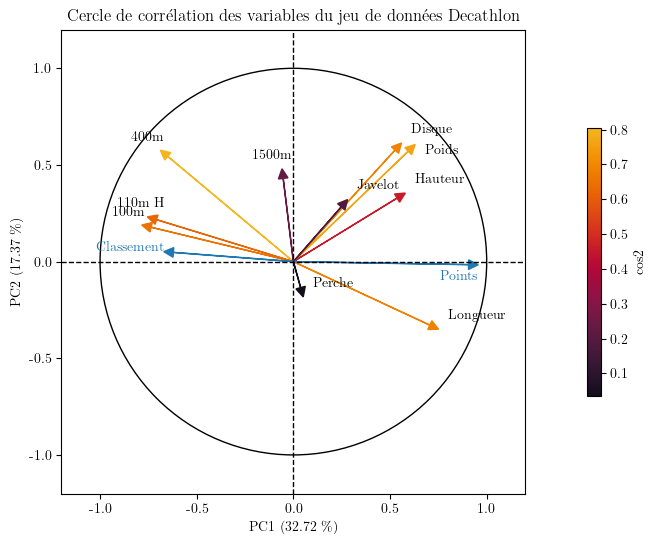

In [140]:
# Représentation par un cercle de corrélation
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal')
# Tracer les axes
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')

# Tracer le cercle de rayon 1
circle = plt.Circle((0,0),1, edgecolor='black', facecolor='white')
ax.add_artist(circle)

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    feature = saturations.index[i] # nom de la var i
    
    ax.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color=df_cos2.iloc[i,1],
         length_includes_head=True
        )
    if feature!='Poids':
        if x>0:
            ax.text(x+0.05, y+0.05, feature)
        else:
            ax.text(x-0.15, y+0.05, feature)
    else :
        ax.text(x+0.05,y-0.05, feature)

# Vecteur de classement
ax.arrow(0,0,  #départ flèche
         sat_class_pc1, sat_class_pc2,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color='tab:blue',
         length_includes_head=True
        )
ax.text(sat_class_pc1-0.35, sat_class_pc2, 'Classement', color='tab:blue')

# Vecteur de points
ax.arrow(0,0,  #départ flèche
         sat_pts_pc1, sat_pts_pc2,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color='tab:blue',
         length_includes_head=True
        )
ax.text(sat_pts_pc1-0.2, sat_pts_pc2-0.08, 'Points', color='tab:blue')

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=np.min(cos2_pc12), vmax=np.max(cos2_pc12))
plt.colorbar(sm, label="cos2",  shrink=0.4,orientation='vertical',pad=0.1, ax=ax)
        
# labels et titres
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.xticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.yticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.title('Cercle de corrélation des variables du jeu de données Decathlon')
plt.tight_layout()
plt.show()

- Les varaibles les mieux représentées sur le plan factorielle (PC1, PC2) sont le 400m, le lancer du poids, le lancer du disque, le saut en longueur et les 100m et 110m haies.

- Appelons groupe 1 les disciplines suivantes : disque, poids, hauteur, javelot. Appelons groupe 2 les disciplines suivantes : 400m, 100m, 110m haies, longueur.
    - Les variables du groupe 1 ont une bonne corrélation entre elles.
    - Les variables du groupe 2 aussi.
    - En revanche les variables du groupe 1 sont très peu corrélées avec les variables du groupe 2.
    
- Les athlètes ayant eu une meilleure performance sur les épreuves de lancers ou de saut en longueur ont fini avec plus de points que ceux qui ont eu de bonnes performances aux courses de sprint et de 400m.

### Cercle de corrélations selon PC1 et PC3

In [53]:
# Calcul des cos2
cos2_pc13 = cos2['PC1']+cos2['PC3']
cos2_pc13

100m        0.650052
Longueur    0.598207
Poids       0.397757
Hauteur     0.404330
400m        0.491133
110m H      0.579600
Disque      0.314741
Perche      0.493088
Javelot     0.234337
1500m       0.630498
dtype: float64

In [54]:
#Echelle de couleurs pour représenter les cos2
cmap = cmr.get_sub_cmap('cmr.ember', 0.1, 0.9)
norm = mcolors.Normalize(vmin=np.min(cos2_pc13), vmax=np.max(cos2_pc13))
color=[]
for i in range(len(cos2_pc13)):
    color.append(cmap(norm(cos2_pc13[i])))
df_cos2_13=pd.DataFrame({'cos2':cos2_pc13, 'couleur':color})
df_cos2_13

,cos2,couleur
100m,0.650052,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
Longueur,0.598207,"(0.9430235, 0.55256245, 0.01530913, 1.0)"
Poids,0.397757,"(0.58606325, 0.06424367, 0.26430788, 1.0)"
Hauteur,0.404330,"(0.61281759, 0.05501854, 0.2580046, 1.0)"
400m,0.491133,"(0.83584655, 0.20387208, 0.11633606, 1.0)"
110m H,0.579600,"(0.9326626, 0.49484757, 0.00407079, 1.0)"
Disque,0.314741,"(0.31214195, 0.10225778, 0.24249139, 1.0)"
Perche,0.493088,"(0.83912274, 0.21082034, 0.11285311, 1.0)"
Javelot,0.234337,"(0.07642223, 0.04959208, 0.10530298, 1.0)"
1500m,0.630498,"(0.95406283, 0.65567405, 0.07821597, 1.0)"


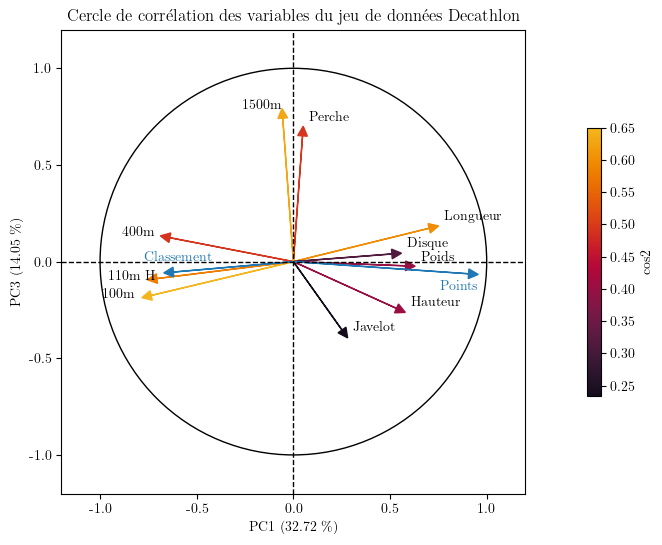

In [141]:
# Représentation par un cercle de corrélation
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal')
# Tracer les axes
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')

# Tracer le cercle de rayon 1
circle = plt.Circle((0,0),1, edgecolor='black', facecolor='white')
ax.add_artist(circle)

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,2] # coord de la var i selon PC2
    feature = saturations.index[i] # nom de la var i
    
    ax.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color=df_cos2_13.iloc[i,1],
         length_includes_head=True
        )
    if feature!='':
        if x>0:
            plt.text(x+0.03, y+0.03, feature)
        else:
            plt.text(x-0.2, y, feature)
    else :
        plt.text(x+0.05,y-0.05, feature)
        
# Vecteur de classement
ax.arrow(0,0,  #départ flèche
         sat_class_pc1, sat_class_pc3,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color='tab:blue',
         length_includes_head=True
        )
ax.text(sat_class_pc1-0.1, sat_class_pc3+0.06, 'Classement', color='tab:blue')

# Vecteur de points
ax.arrow(0,0,  #départ flèche
         sat_pts_pc1, sat_pts_pc3,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         color='tab:blue',
         length_includes_head=True
        )
ax.text(sat_pts_pc1-0.2, sat_pts_pc3-0.08, 'Points', color='tab:blue')

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=np.min(cos2_pc13), vmax=np.max(cos2_pc13))
plt.colorbar(sm, label="cos2",  shrink=0.4,orientation='vertical',pad=0.1, ax=ax)
        
# labels et titres
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.xticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.yticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC3 ('+ str(round(pca.explained_variance_ratio_[2]*100,2)) + ' \%)')
plt.title('Cercle de corrélation des variables du jeu de données Decathlon')
plt.tight_layout()
plt.show()

Dans ce plan, les variables Perche et 1500 m sont bien mieux représentées. Les deux disciplines de sprint et le saut en longueur sont bien représentés aussi. En revanche les disciplines de lancers sont moins bien représentées que dans le plan (PC1, PC2).

On retrouve le fait que les athlètes ayant marqué le plus de points sont ceux qui ont eu de meilleures performances aux lancers et au saut en longueur, contrairement à ceux qui ont fait une bonne performance aux sprints et au 400m.

***
### 2. Biplot

In [100]:
cos2_indiv = ((features_trans**2)
              .divide(((features_trans**2)
                       .sum(axis=1)),axis=0)
             )
cos2_indiv.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.695410,0.079543,0.003585,0.160666,0.006059,0.000196,0.013133,0.024151,0.000165,0.017092
1,0.711205,0.032432,0.002474,0.103335,0.049846,0.030575,0.034843,0.004246,0.000008,0.031034
2,0.851755,0.000064,0.000069,0.068851,0.001406,0.021948,0.008230,0.045760,0.001297,0.000619
3,0.423049,0.092039,0.294777,0.046845,0.080996,0.000136,0.003149,0.040347,0.016301,0.002360
4,0.529944,0.366472,0.081626,0.009129,0.002583,0.000710,0.000419,0.005188,0.003158,0.000771


In [101]:
cos2_indiv_12 = cos2_indiv['PC1'] + cos2_indiv['PC2']

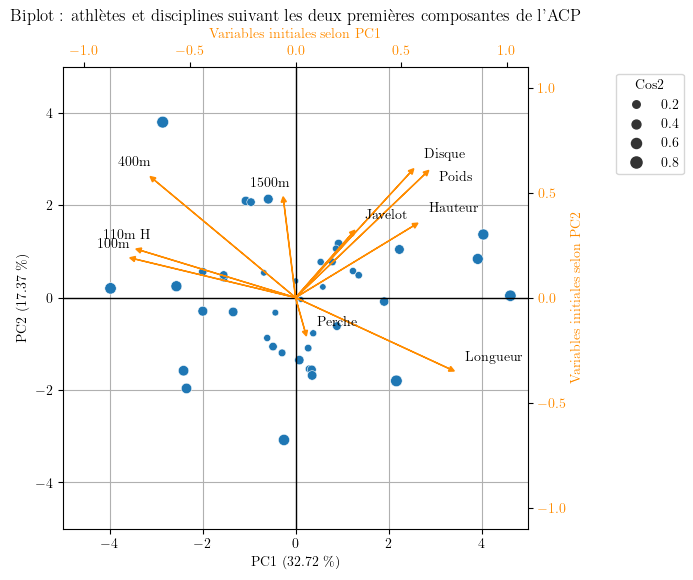

In [105]:
import seaborn as sns
import cmasher as cmr

# Représentation des individus suivant les deux premières composantes
fig, ax = plt.subplots(figsize=(6,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC2', data=features_trans, size=cos2_indiv_12)
ax.set_xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' \%)')
ax.set_ylabel('PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.xlim(-5,5)
plt.ylim(-5,5)

#deuxième repère pour les vecteurs
ax2 = fig.add_axes(ax.get_position(), frame_on=False)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xlabel('Variables initiales selon PC1', color='darkorange')
ax2.set_ylabel('Variables initiales selon PC2', color='darkorange')
ax2.tick_params(axis='both', labelcolor='darkorange')
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    feature = saturations.index[i] # nom de la var i
    
    ax2.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.025,
         head_length=0.025,
         length_includes_head=True,
              color='darkorange'
        )
    if feature!='Poids':
        if x>0:
            plt.text(x+0.05, y+0.05, feature)
        else:
            plt.text(x-0.15, y+0.05, feature)
    else :
        plt.text(x+0.05,y-0.05, feature)
    


# Titre
plt.title("Biplot : athlètes et disciplines suivant les deux premières composantes de l'ACP")
ax.legend(title='Cos2', bbox_to_anchor=[1.35,1])

# Grille
ax.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

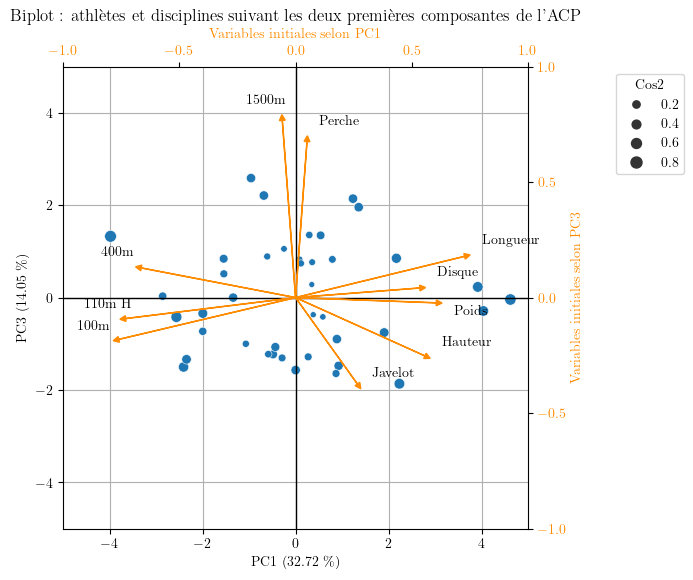

In [108]:
cos2_indiv_13 = cos2_indiv['PC1'] + cos2_indiv['PC3']

# Représentation des individus suivant PC1 et PC3
fig, ax = plt.subplots(figsize=(6,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC3', data=features_trans, size=cos2_indiv_13)
ax.set_xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' \%)')
ax.set_ylabel('PC3 ('+ str(round(pca.explained_variance_ratio_[2]*100,2)) + ' \%)')
plt.xlim(-5,5)
plt.ylim(-5,5)

#deuxième repère pour les vecteurs
ax2 = fig.add_axes(ax.get_position(), frame_on=False)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xlabel('Variables initiales selon PC1', color='darkorange')
ax2.set_ylabel('Variables initiales selon PC3', color='darkorange')
ax2.tick_params(axis='both', labelcolor='darkorange')
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,2] # coord de la var i selon PC3
    feature = saturations.index[i] # nom de la var i
    
    ax2.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.025,
         head_length=0.025,
         length_includes_head=True,
         color='darkorange'
        )
    if feature!='Poids':
        if x>0:
            plt.text(x+0.05, y+0.05, feature)
        else:
            plt.text(x-0.15, y+0.05, feature)
    else :
        plt.text(x+0.05,y-0.05, feature)
    


# Titre
plt.title("Biplot : athlètes et disciplines suivant les deux premières composantes de l'ACP")
ax.legend(title='Cos2', bbox_to_anchor=[1.35,1])

# Grille
ax.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

Dans les deux plans, les individus les mieux représentés sont de manière générale ceux qui prennent une grande valeur sur l'une des composantes principales.

***
### 3. Représentation des individus suivant les trois premières composantes principales.

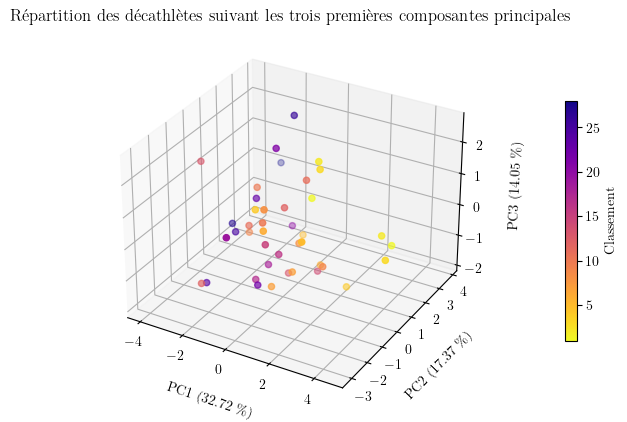

In [171]:
# Création de la figure
fig = plt.figure(figsize = (30, 10))
ax = plt.axes(projection ="3d")

cmap='plasma_r'

# Création du graphique
sctt = ax.scatter3D(features_trans['PC1'], features_trans['PC2'], features_trans['PC3'], c=df_decathlon['Classement'], cmap=cmap)

# Titres et labels
ax.set_xlabel('PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' \%)')
ax.set_ylabel('PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100,2)) + ' \%)')
ax.set_zlabel('PC3 ('+ str(round(pca.explained_variance_ratio_[2]*100,2)) + ' \%)')
ax.set_title("Répartition des décathlètes suivant les trois premières composantes principales")

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=np.min(df_decathlon['Classement']), vmax=np.max(df_decathlon['Classement']))
plt.colorbar(sm, label="Classement", shrink=0.3, orientation='vertical',pad=0.1, anchor = (0.5,0.5), ax=ax)

# Ajustement de l'affichage
ax.tick_params(axis='x', pad=-0.5)
ax.tick_params(axis='y', pad=-0.5)
ax.tick_params(axis='z', pad=-0.5)
plt.subplots_adjust(left=0.6, right=0.77, top=1, bottom=0.2)
plt.show()

Difficile de distinguer la forme du nuage de points. Utilisons une version interactive.

In [197]:
import plotly.express as px


# Création du graphe
fig = px.scatter_3d(features_trans, x='PC1', y='PC2', z='PC3',
                   color=df_decathlon['Classement'], color_continuous_scale='plasma_r')

# Changement fenêtre de survol
fig.update_traces(hovertemplate="PC1: %{x}<br>PC2: %{y}<br>PC3: %{z}<br>Classement: %{customdata[0]}",
                  customdata=df_decathlon[['Classement']].values)

# Ajout d'une bordure aux points
fig.update_traces(marker=dict(
                            size=4,
                            line=dict(width=1,
                                      color='DarkSlateGrey')
                            )
                 )

# titres, labels et vue d'origine
fig.update_layout(width=1000,
                  height=800,
                  scene = dict(
                            xaxis_title='PC1 ('+ str(round(pca.explained_variance_ratio_[0]*100,2)) + ' %)',
                            yaxis_title='PC2 ('+ str(round(pca.explained_variance_ratio_[1]*100,2)) + ' %)',
                            zaxis_title='PC3 ('+ str(round(pca.explained_variance_ratio_[2]*100,2)) + ' %)'),
                  title_text="Répartition des décathlètes suivant les trois premières composantes principales",
                  title_y=0.9,
                  scene_camera=dict(
                      eye=dict(x=1.8, y=-1.25, z=0.8)),
                  autosize=False,
                  coloraxis_colorbar_title ="Classement",
                  )

#Affichage
fig.show()